In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import seaborn as sns
import math
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
import seaborn as sns
import matplotlib
from sklearn.preprocessing import Binarizer
import sklearn
import math
from sklearn.preprocessing import OneHotEncoder
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

#Timeseries related models
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.simplefilter('ignore')

In [3]:
df1=pd.read_csv(r"C:\Users\SaurabhM\Desktop\data3\train.csv")
df2=pd.read_csv(r"C:\Users\SaurabhM\Desktop\data3\test.csv")

In [4]:
df1.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0


In [5]:
df1.shape

(26496, 8)

In [6]:
df2.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2
0,552,2013-07-24 00:00:00,-10.0,-16.4,1011.0,263.280,A
1,553,2013-07-24 01:00:00,-10.0,-20.7,1011.0,267.175,A
2,554,2013-07-24 02:00:00,-10.7,-17.1,1003.0,269.555,A
3,555,2013-07-24 03:00:00,-13.6,-20.7,1008.0,273.060,A
4,556,2013-07-24 04:00:00,-10.7,-17.1,1006.0,1.765,A


In [7]:
df2.shape

(8568, 7)

In [12]:
df1.isnull().sum().sort_values(ascending=False)

electricity_consumption    0
var2                       0
windspeed                  0
pressure                   0
var1                       0
temperature                0
datetime                   0
ID                         0
dtype: int64

In [14]:
df2.isnull().sum().sort_values(ascending=False)

var2           0
windspeed      0
pressure       0
var1           0
temperature    0
datetime       0
ID             0
dtype: int64

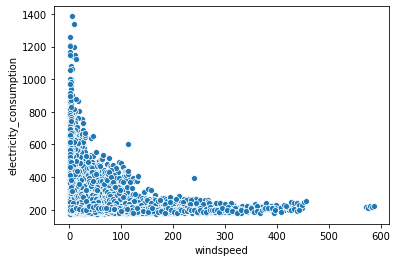

In [16]:
sns.scatterplot(x="windspeed",y="electricity_consumption",data=df1)

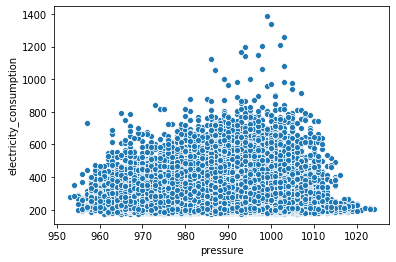

In [17]:
sns.scatterplot(x="pressure",y="electricity_consumption",data=df1)

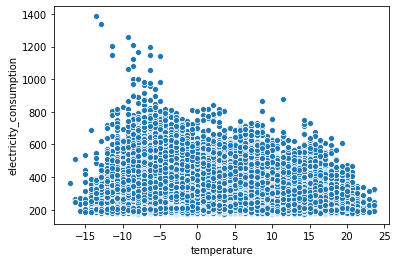

In [18]:
sns.scatterplot(x="temperature",y="electricity_consumption",data=df1)

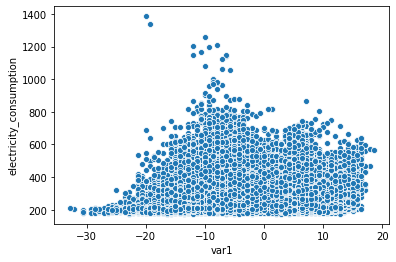

In [19]:
sns.scatterplot(x="var1",y="electricity_consumption",data=df1)

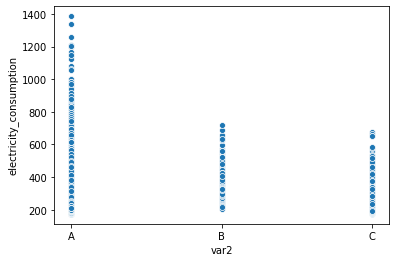

In [20]:
sns.scatterplot(x="var2",y="electricity_consumption",data=df1)

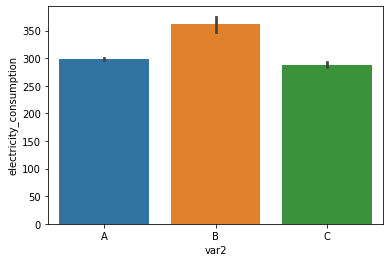

In [21]:
sns.barplot(x="var2",y="electricity_consumption",data=df1)

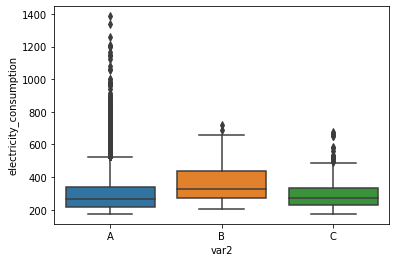

In [22]:
sns.boxplot(x="var2",y="electricity_consumption",data=df1)

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 8 columns):
ID                         26496 non-null int64
datetime                   26496 non-null object
temperature                26496 non-null float64
var1                       26496 non-null float64
pressure                   26496 non-null float64
windspeed                  26496 non-null float64
var2                       26496 non-null object
electricity_consumption    26496 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.6+ MB


In [26]:
df1["datetime"]=pd.to_datetime(df1["datetime"])

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 8 columns):
ID                         26496 non-null int64
datetime                   26496 non-null datetime64[ns]
temperature                26496 non-null float64
var1                       26496 non-null float64
pressure                   26496 non-null float64
windspeed                  26496 non-null float64
var2                       26496 non-null object
electricity_consumption    26496 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 1.6+ MB


In [28]:
df1.set_index("datetime",inplace=True)

Text(0, 0.5, 'Electricity Consumption')

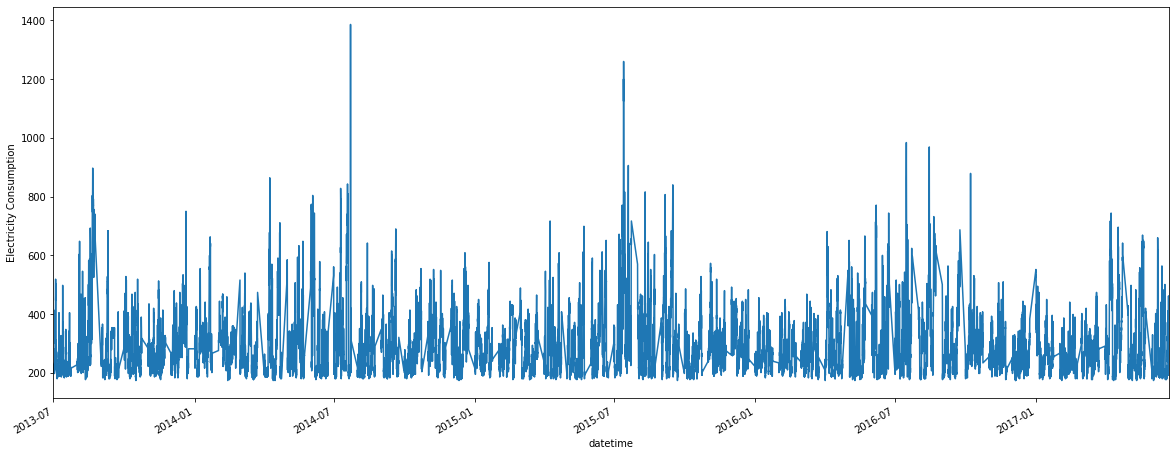

In [31]:


df1["electricity_consumption"].plot(figsize=(20,8))
plt.ylabel("Electricity Consumption")

In [39]:
# Earliest date index location
print('Earliest date index location is: ',df1.index.min())

# Latest date location
print('Latest date location: ',df1.index.max())

Earliest date index location is:  2013-07-01 00:00:00
Latest date location:  2017-06-23 23:00:00


In [36]:
df1.head()

,ID,temperature,var1,pressure,windspeed,var2,electricity_consumption
datetime,,,,,,,
2013-07-01 00:00:00,0,-11.4,-17.1,1003.0,571.910,A,216.0
2013-07-01 01:00:00,1,-12.1,-19.3,996.0,575.040,A,210.0
2013-07-01 02:00:00,2,-12.9,-20.0,1000.0,578.435,A,225.0
2013-07-01 03:00:00,3,-11.4,-17.1,995.0,582.580,A,216.0
2013-07-01 04:00:00,4,-11.4,-19.3,1005.0,586.600,A,222.0
